In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load data from the Excel file
file_path = r"D:\Armaghan_PhD_Dissertation\database\Revised data\new data-3 - revised with new data.xlsx"
ti_data = pd.read_excel(file_path, sheet_name='Ti')
o2_data = pd.read_excel(file_path, sheet_name='O2')

# Function to normalize only the density feature
def normalize_density(df):
    scaler = StandardScaler()
    df_normalized = df.copy()
    df_normalized[['Density (g/cm3)']] = scaler.fit_transform(df[['Density (g/cm3)']])
    return df_normalized, scaler

# Function to prepare and filter data based on temperature
def get_data_by_temperature(df, temperature):
    return df[df['T (K)'] == temperature]

# Function to combine data from two sheets and prepare the dataset
def combine_data(temp, ti_data, o2_data):
    ti_temp_data = get_data_by_temperature(ti_data, temp)
    o2_temp_data = get_data_by_temperature(o2_data, temp)
    if ti_temp_data.empty or o2_temp_data.empty:
        print(f"No data available for temperature {temp} in one or both sheets.")
        return None
    combined_data = pd.DataFrame({
        'T (K)': ti_temp_data['T (K)'],
        'Density_Ti': ti_temp_data['Density (g/cm3)'].values,
        'Density_O2': o2_temp_data['Density (g/cm3)'].values,
        'Thermal_Conductivity_Ti': ti_temp_data['Thermal Conductivity (W/m.K)'].values,
        'Thermal_Conductivity_O2': o2_temp_data['Thermal Conductivity (W/m.K)'].values,
        'Specific_Heat_Ti': ti_temp_data['Specific Heat (J/g.C)'].values,
        'Specific_Heat_O2': o2_temp_data['Specific Heat (J/g.C)'].values
    })
    combined_data['Density_combined'] = (combined_data['Density_Ti'] + combined_data['Density_O2']) / 2
    combined_data['Thermal_Conductivity_combined'] = (combined_data['Thermal_Conductivity_Ti'] + combined_data['Thermal_Conductivity_O2']) / 2
    combined_data['Specific_Heat_combined'] = (combined_data['Specific_Heat_Ti'] + combined_data['Specific_Heat_O2']) / 2
    return combined_data

# Function to create features and target variables
def create_features_and_targets(combined_data):
    features = combined_data[['T (K)', 'Density_Ti', 'Density_O2', 'Thermal_Conductivity_Ti', 'Thermal_Conductivity_O2', 'Specific_Heat_Ti', 'Specific_Heat_O2']]
    targets = combined_data[['Density_combined', 'Thermal_Conductivity_combined', 'Specific_Heat_combined']]
    return features, targets

# Function to train the Decision Tree model
def train_decision_tree(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X[['T (K)', 'Density_Ti', 'Density_O2']])
    if len(X_scaled) > 1:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    else:
        X_train, X_test, y_train, y_test = X_scaled, X_scaled, y, y
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    print(f"Decision Tree Mean Squared Error: {mse_dt:.4f}")
    return dt_model, scaler

# Function to predict properties based on a given temperature using Decision Tree
def predict_properties_dt(temp, ti_data, o2_data):
    ti_data_normalized, _ = normalize_density(ti_data)
    o2_data_normalized, _ = normalize_density(o2_data)
    combined_data = combine_data(temp, ti_data_normalized, o2_data_normalized)
    if combined_data is None:
        return
    X, y = create_features_and_targets(combined_data)
    dt_model, scaler = train_decision_tree(X, y)
    X_scaled = scaler.transform(X[['T (K)', 'Density_Ti', 'Density_O2']])
    predictions_dt = dt_model.predict(X_scaled)
    predictions_dt = np.maximum(predictions_dt, 1e-5)
    print(f"Predicted Properties for TiO2 at {temp} K using Decision Tree:")
    print(f"Density (g/cm3): {predictions_dt[0][0]:.4f}")
    print(f"Thermal Conductivity (W/m.K): {predictions_dt[0][1]:.4f}")
    print(f"Specific Heat (J/g.C): {predictions_dt[0][2]:.4f}")

# Example usage
temperature = float(input("Enter temperature (K): "))
predict_properties_dt(temperature, ti_data, o2_data)


Enter temperature (K): 334.15
Decision Tree Mean Squared Error: 0.0000
Predicted Properties for TiO2 at 334.15 K using Decision Tree:
Density (g/cm3): 1.0876
Thermal Conductivity (W/m.K): 22.3072
Specific Heat (J/g.C): 0.6840


Decision Tree Mean Squared Error: 0.0029


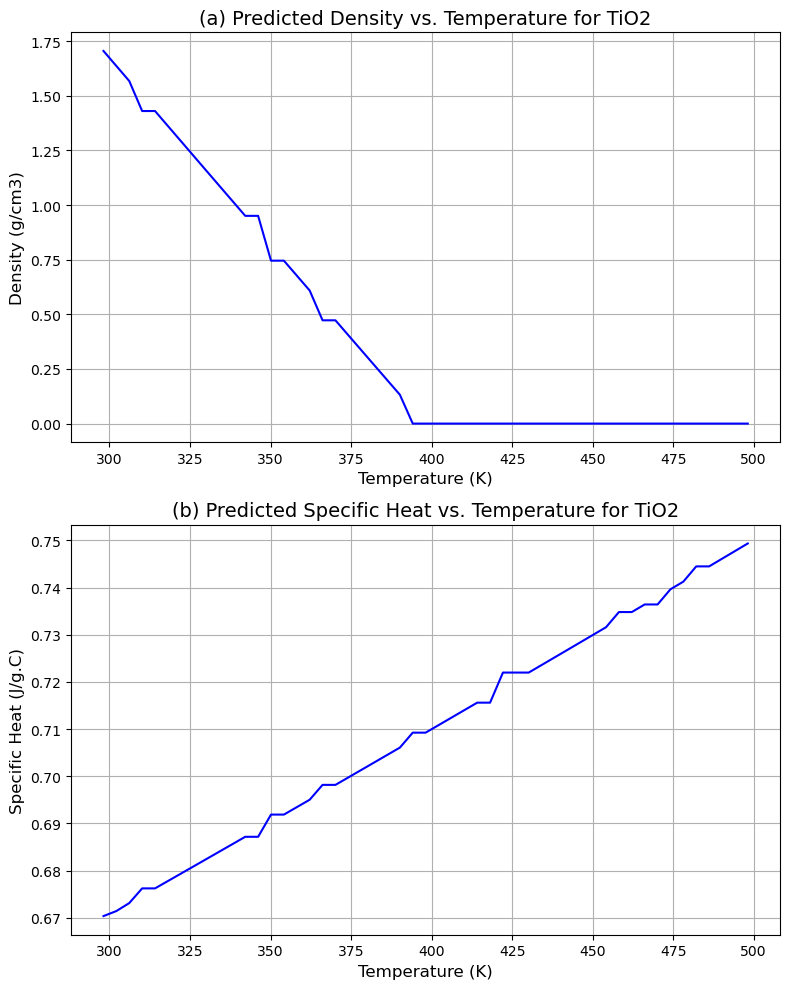

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load data from the Excel file
file_path = r"D:\Armaghan_PhD_Dissertation\database\Revised data\new data-3 - revised with new data.xlsx"
ti_data = pd.read_excel(file_path, sheet_name='Ti')
o2_data = pd.read_excel(file_path, sheet_name='O2')

# Function to normalize only the density feature
def normalize_density(df):
    scaler = StandardScaler()
    df_normalized = df.copy()
    df_normalized[['Density (g/cm3)']] = scaler.fit_transform(df[['Density (g/cm3)']])
    return df_normalized, scaler

# Function to prepare and filter data based on temperature
def get_data_by_temperature(df, temperature):
    return df[df['T (K)'] == temperature]

# Function to combine data from two sheets and prepare the dataset
def combine_data(temp, ti_data, o2_data):
    ti_temp_data = get_data_by_temperature(ti_data, temp)
    o2_temp_data = get_data_by_temperature(o2_data, temp)
    if ti_temp_data.empty or o2_temp_data.empty:
        print(f"No data available for temperature {temp} in one or both sheets.")
        return None
    combined_data = pd.DataFrame({
        'T (K)': ti_temp_data['T (K)'],
        'Density_Ti': ti_temp_data['Density (g/cm3)'].values,
        'Density_O2': o2_temp_data['Density (g/cm3)'].values,
        'Specific_Heat_Ti': ti_temp_data['Specific Heat (J/g.C)'].values,
        'Specific_Heat_O2': o2_temp_data['Specific Heat (J/g.C)'].values
    })
    combined_data['Density_combined'] = (combined_data['Density_Ti'] + combined_data['Density_O2']) / 2
    combined_data['Specific_Heat_combined'] = (combined_data['Specific_Heat_Ti'] + combined_data['Specific_Heat_O2']) / 2
    return combined_data

# Function to create features and target variables
def create_features_and_targets(combined_data):
    features = combined_data[['T (K)', 'Density_Ti', 'Density_O2']]
    targets = combined_data[['Density_combined', 'Specific_Heat_combined']]
    return features, targets

# Function to train the Decision Tree model
def train_decision_tree(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X[['T (K)', 'Density_Ti', 'Density_O2']])
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    print(f"Decision Tree Mean Squared Error: {mse_dt:.4f}")
    return dt_model, scaler

# Function to predict properties across all temperatures using Decision Tree
def predict_properties_dt_all(ti_data, o2_data):
    ti_data_normalized, _ = normalize_density(ti_data)
    o2_data_normalized, _ = normalize_density(o2_data)

    combined_data_all = pd.DataFrame()

    for temp in ti_data['T (K)'].unique():
        combined_data = combine_data(temp, ti_data_normalized, o2_data_normalized)
        if combined_data is not None:
            combined_data_all = pd.concat([combined_data_all, combined_data], ignore_index=True)

    X, y = create_features_and_targets(combined_data_all)
    dt_model, scaler = train_decision_tree(X, y)
    X_scaled = scaler.transform(X[['T (K)', 'Density_Ti', 'Density_O2']])
    predictions_dt = dt_model.predict(X_scaled)
    predictions_dt = np.maximum(predictions_dt, 1e-5)
    
    # Plotting the results
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))

    # Subplot (a) - Density
    axs[0].plot(combined_data_all['T (K)'], predictions_dt[:, 0], color='blue')
    axs[0].set_title('(a) Predicted Density vs. Temperature for TiO2', fontsize=14)
    axs[0].set_xlabel('Temperature (K)', fontsize=12)
    axs[0].set_ylabel('Density (g/cm3)', fontsize=12)
    axs[0].grid(True)
    axs[0].set_facecolor('white')

    # Subplot (b) - Specific Heat
    axs[1].plot(combined_data_all['T (K)'], predictions_dt[:, 1], color='blue')
    axs[1].set_title('(b) Predicted Specific Heat vs. Temperature for TiO2', fontsize=14)
    axs[1].set_xlabel('Temperature (K)', fontsize=12)
    axs[1].set_ylabel('Specific Heat (J/g.C)', fontsize=12)
    axs[1].grid(True)
    axs[1].set_facecolor('white')

    plt.tight_layout()
    plt.show()

# Plot results for all temperatures
predict_properties_dt_all(ti_data, o2_data)
